In [1]:
import pandas as pd

from pymongo import MongoClient
from pymongo.errors import OperationFailure

import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

Text(0, 0.5, 'Draw ID')

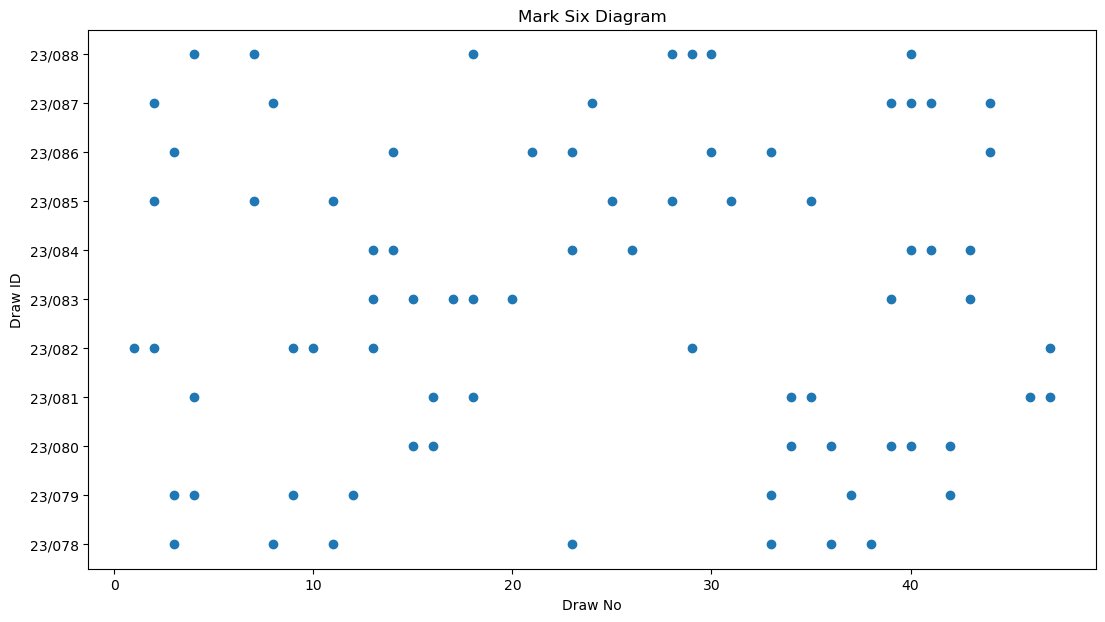

In [30]:
url = 'mongodb://localhost:27017'
client = MongoClient(url)

db = client['mydb']
collection = db['marksix']

list_cur = list(collection.find().limit(100).sort('drawId', 1))
df_ms_hist = pd.DataFrame(list_cur)
cols=list(df_ms_hist.columns)

L=[]
for index, row in df_ms_hist.iterrows():
    drawId=row[cols[1]]
    for i in range(7):
        D={}
        D['drawId']=drawId
        D['drawNo']=int(row[cols[i+3]])
        L.append(D)
df_ms_output=pd.DataFrame.from_records(L)

# create a figure and axis
#fig, ax = plt.subplots(figsize=(12,5))
fig, ax = plt.subplots(figsize=(13,7))

# scatter the sepal_length against the sepal_width
#ax.scatter(df_ms_output['drawId'], df_ms_output['drawNo'])
ax.scatter(df_ms_output['drawNo'], df_ms_output['drawId'])
# set a title and labels
ax.set_title('Mark Six Diagram')
ax.set_xlabel('Draw No')
ax.set_ylabel('Draw ID')